# Predicción precios de casas
## Elaborado por Martín Ordóñez

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# Importar árboles de ensacado y clasificadores de bosques aleatorios
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Track Machine Learning I/Introducción to Machine Learning/Árboles de decisiones /kc_house_data.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
X = df.loc[:, df.columns != 'price']

In [6]:
X = X.drop(['id', 'date', 'zipcode' ], axis=1)

In [7]:
y = df.loc[:, 'price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
clf = RandomForestRegressor(n_estimators=10,
                             bootstrap=True,
                             oob_score=True)

In [22]:
# Mirando algunos hiperparámetros que parecen ajustables
clf

RandomForestRegressor(n_estimators=10, oob_score=True)

In [23]:
clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True)

In [24]:
clf.predict(X_test)

array([ 412740. , 1872280. ,  726300. , ...,  241480. ,  310800. ,
        539232.5])

In [25]:
# calcular la precisión de clasificación para el modelo que se entrenó
score = clf.score(X_test, y_test)
score

0.8723320830813466

In [26]:
clf.oob_score_

0.7972389732270837

In [31]:
estimator_range = [1] + list(range(10, 100, 10))

In [32]:
estimator_range

[1, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [33]:
# Lista para almacenar las precisiones promedio para cada valor de n_estimators:
scores = []
# Use la división entrenamiento prueba con cada valor de n_estimators (Advertencia: ¡Lento!)
for estimator in estimator_range:
    clf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=1,
                                 bootstrap=True)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

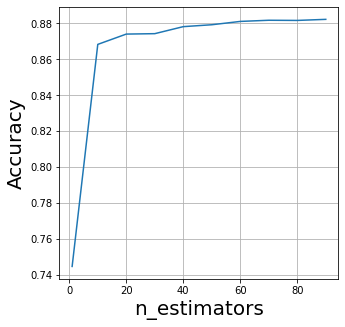

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

A mayor cantidad de n_estimators, el modelo tiene un mejor ajuste

¿Cuáles son las características más importantes de tu modelo?
Las características más importantes del modelo radica en la definición de sus métricas y la cantidad de n_estimators que se le designe.

¿Qué otros parámetros podrías haber intentado ajustar?

criterion='mse'
min_samples_split=2
max_depth=None

Se pudo cambiar estos parámetros, ya que estos son los parámetros por defecto.